In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

I used the Python Library HomeHarvest, which scrapes data from Realtors.com, Zillow, and Redfin. I used it to scrap for any homes sold, pending, or for sale in Chicago. Then, I saved the data as a csv. 

In [1]:
from homeharvest import scrape_property
from datetime import datetime

In [2]:
current_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"HomeHarvest_{current_timestamp}.csv"

sold_properties = scrape_property(
    location="Chicago, IL",
    listing_type="sold",
    past_days=730,
)
print(f"Number of sold properties: {len(sold_properties)}")
print(sold_properties.head())

Number of sold properties: 10000
                                        property_url property_id  listing_id  \
0  https://www.realtor.com/realestateandhomes-det...  8465976945  2984577584   
1  https://www.realtor.com/realestateandhomes-det...  8404151066  2983348487   
2  https://www.realtor.com/realestateandhomes-det...  8659750276  2985034940   
3  https://www.realtor.com/realestateandhomes-det...  7998729282  2983428700   
4  https://www.realtor.com/realestateandhomes-det...  8818482037  2984273843   

                                           permalink   mls    mls_id status  \
0  3117-N-Orchard-St-Apt-3E_Chicago_IL_60657_M846...  CHIL  12424190   SOLD   
1   4834-W-Potomac-Ave_Chicago_IL_60651_M84041-51066  CHIL  12398945   SOLD   
2  125-E-13th-St-Unit-1013_Chicago_IL_60605_M8659...  CHIL  12437089   SOLD   
3  1070-W-15th-St-Unit-105_Chicago_IL_60608_M7998...  CHIL  12401069   SOLD   
4  100-E-Bellevue-Pl-Apt-5F_Chicago_IL_60611_M881...  CHIL  12419255   SOLD   

  mls_statu

In [3]:
pending_properties = scrape_property(
    location="Chicago, IL",
    listing_type="pending",
    past_days=730,
)
print(f"Number of pending properties: {len(pending_properties)}")
print(pending_properties.head())

Number of pending properties: 3365
                                        property_url property_id  listing_id  \
0  https://www.realtor.com/realestateandhomes-det...  7307684686  2984845688   
1  https://www.realtor.com/realestateandhomes-det...  8155138112  2984866043   
2  https://www.realtor.com/realestateandhomes-det...  8091714627  2981019401   
3  https://www.realtor.com/realestateandhomes-det...  8356519353  2985939133   
4  https://www.realtor.com/realestateandhomes-det...  8949966432  2986038378   

                                           permalink   mls    mls_id  \
0  300-N-State-St-Apt-2824_Chicago_IL_60654_M7307...  CHIL  12433461   
1   7750-S-Crandon-Ave_Chicago_IL_60649_M81551-38112  CHIL  12434443   
2   8343-S-Calumet-Ave_Chicago_IL_60619_M80917-14627  CHIL  12347062   
3  247-E-Chestnut-St-Apt-502_Chicago_IL_60611_M83...  CHIL  12460567   
4  5759-W-Pensacola-Ave_Chicago_IL_60634_M89499-6...  CHIL  12462411   

       status mls_status                           

In [5]:
for_sale_properties = scrape_property(
    location="Chicago, IL",
    listing_type="for_sale",
    past_days=730,
)
print(f"Number of for sale properties: {len(for_sale_properties)}")
print(for_sale_properties.head())

Number of for sale properties: 9354
                                        property_url property_id  listing_id  \
0  https://www.realtor.com/realestateandhomes-det...  8143925618  2986047116   
1  https://www.realtor.com/realestateandhomes-det...  7208068450  2985454456   
2  https://www.realtor.com/realestateandhomes-det...  7731920998  2985232795   
3  https://www.realtor.com/realestateandhomes-det...  9833235201  2986147720   
4  https://www.realtor.com/realestateandhomes-det...  7419229111  2985486318   

                                           permalink   mls    mls_id  \
0  6212-N-Avondale-Ave_Chicago_IL_60631_M81439-25618  CHIL  12461371   
1  2603-N-Greenview-Ave_Chicago_IL_60614_M72080-6...  CHIL  12448689   
2  1500-W-Monroe-St-Unit-523_Chicago_IL_60607_M77...  CHIL  12442545   
3  1425-W-Fullerton-Ave-Unit-4S_Chicago_IL_60614_...  CHIL  12320125   
4  937-W-Wrightwood-Ave-C_Chicago_IL_60614_M74192...  CHIL  12450043   

       status mls_status                          

In [7]:
import pandas as pd

In [23]:
df = pd.concat([sold_properties, pending_properties, for_sale_properties])
print(len(df))

22719


In [24]:
df.to_csv("raw_data.csv", index=False)

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [25]:
df = df[["property_id", "formatted_address", "zip_code", "style", "beds", 
                           "full_baths", "half_baths", "sqft", "year_built", 
                           "list_price", "sold_price"]]

df = df.dropna(subset=['zip_code', "list_price", "sold_price", "sqft", "beds", "full_baths"])
print(len(df))

df.drop_duplicates(inplace=True)
print(len(df))

10383
8779


In [26]:
df.to_csv("data.csv", index=False)

I've taken the dataset and some of the columns I've estimated will have the greatest value in this predictor. After dropping the nan values within a few important columns, my dataset is down to 10,383. After dropping all the duplicate values, I'm down to 8779 properties. This is a signifcant decrease from my original count of 22,719. 

A few of the columns I got are less important and will NOT be used for training, just identification purposes, like formatting address and property id. Zip code and style will need to be one-hot-encoded since they are categorical variables, and I'll combined full and half baths into a single baths column. 

In [28]:
import matplotlib.pyplot as plt

In [ ]:
df["age"] = datetime.now().year - df["year_built"]
df.drop(columns="year_built", inplace=True)

In [56]:
# look at diff between sold and list price
# predicting sold price

# outlier calcs
outlier_upper = df["sold_price"].mean() + (2 * df["sold_price"].std())
outlier_lower = df["sold_price"].mean() - (2 * df["sold_price"].std())
print(f"Outlier bounds: {outlier_lower} - {outlier_upper}")

outliers = df[(df["sold_price"] > outlier_upper) | (df["sold_price"] < outlier_lower)]
print("Outliers:", outliers[["formatted_address", "sold_price"]])

Outlier bounds: -1056728.1061405218 - 1970419.154323686
Outliers:                                     formatted_address sold_price
20             2043 N Clifton Ave, Chicago, IL, 60614    5150000
178             2212 W Cullom Ave, Chicago, IL, 60618    2171000
275         4242 N Winchester Ave, Chicago, IL, 60613    2412500
479              3619 N Hoyne Ave, Chicago, IL, 60618    2680000
574          1942 N Cleveland Ave, Chicago, IL, 60614    2590000
...                                               ...        ...
7144     401 N Wabash St Unit 33A, Chicago, IL, 60611    2500000
7870  800 N Michigan Ave Apt 2502, Chicago, IL, 60611    2405000
8183      159 E Walton Pl Apt 15A, Chicago, IL, 60611    2000000
9268    401 N Wabash Ave Unit 49G, Chicago, IL, 60611    2500000
9298    401 N Wabash Ave Unit 33K, Chicago, IL, 60611    2236500

[209 rows x 2 columns]


<Figure size 1200x400 with 0 Axes>

Calculating statistical outlier bounds gives us a sold price outlier of 0 - around 2 million. This is a very large range and is most likely due to Chicago's diverse housing market.

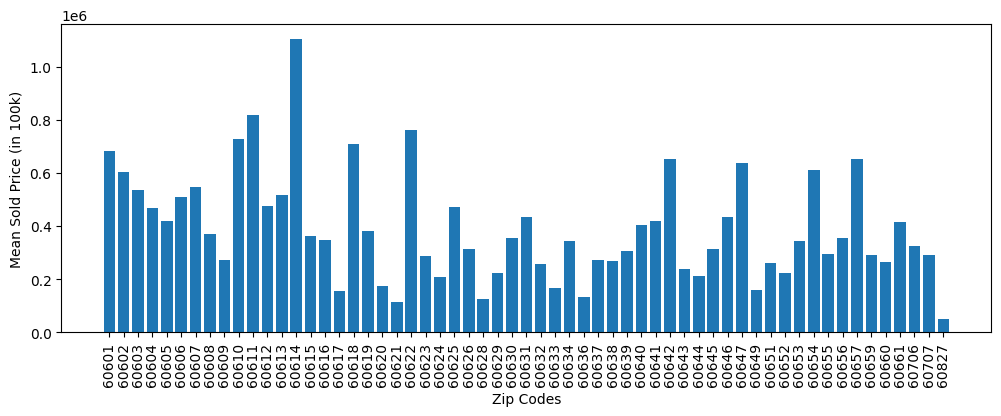

In [60]:
# zip_code vs. price
# would indicate richer zip codes

plt.figure(figsize=(12, 4))

grouped_data = df.groupby("zip_code", as_index=False)["sold_price"].mean()

plt.bar(grouped_data["zip_code"], grouped_data["sold_price"])

plt.xticks(rotation=90)
plt.xlabel("Zip Codes")
plt.ylabel("Mean Sold Price (in 100k)")
plt.show()

The zipcodes need to be one-hot-encoded.
The highest mean selling price has a zipcode of 60614, and the lowest is 60827. 

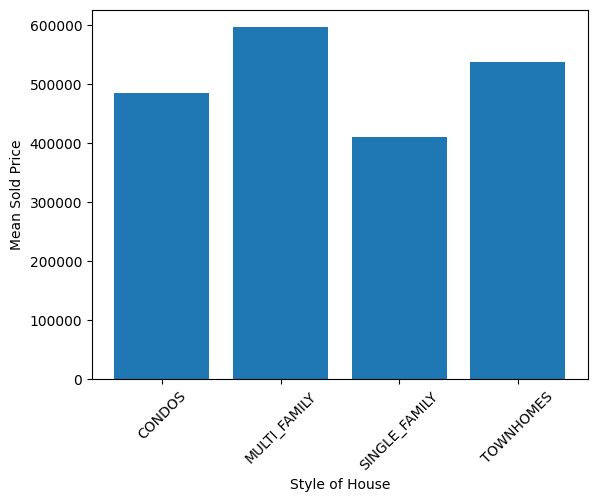

In [64]:
# style vs. price
# larger homes, pricier

grouped_data = df.groupby("style", as_index=False)["sold_price"].mean()

plt.bar(grouped_data["style"], grouped_data["sold_price"])

plt.xticks(rotation=45)
plt.xlabel("Style of House")
plt.ylabel("Mean Sold Price")
plt.show()

The trends seem to make sense, with houses being higher than condos or single family houses. However, this metric might just be easier to figure out using the number of beds and baths.

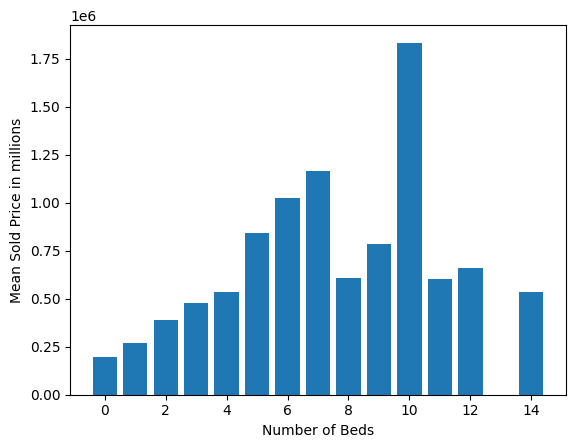

In [83]:
# beds vs. price
# more beds, higher price

grouped_data = df.groupby("beds", as_index=False)["sold_price"].mean()

plt.bar(grouped_data["beds"], grouped_data["sold_price"])

plt.xlabel("Number of Beds")
plt.ylabel("Mean Sold Price in millions")
plt.show()

The sold price does increase and act as intended until about 7 rooms, and then it starts to go a little weird. 10 rooms has the maximum mean sold price, but 8, 11, and 14, which are all supposed to be high according to the trend, are very low, about the same price as the 5 room properties.

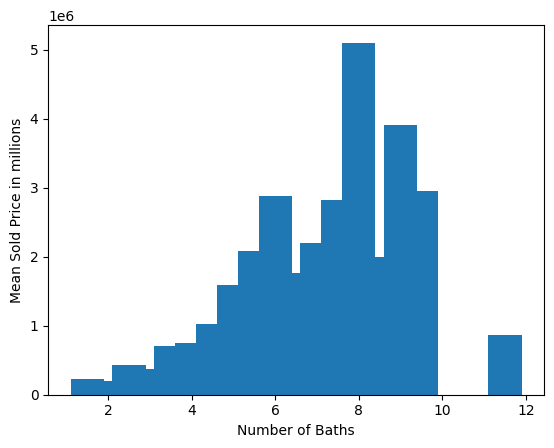

In [84]:
# baths vs. price
# more baths, higher price
df["baths"] = df["full_baths"] + (df["half_baths"] * 0.5).bfill()

grouped_data = df.groupby("baths", as_index=False)["sold_price"].mean()

plt.bar(grouped_data["baths"], grouped_data["sold_price"])

plt.xlabel("Number of Baths")
plt.ylabel("Mean Sold Price in millions")
plt.show()

This attribute does mostly follow the trend of increases rooms with increasing prices. It has a peak at around 8 baths. 

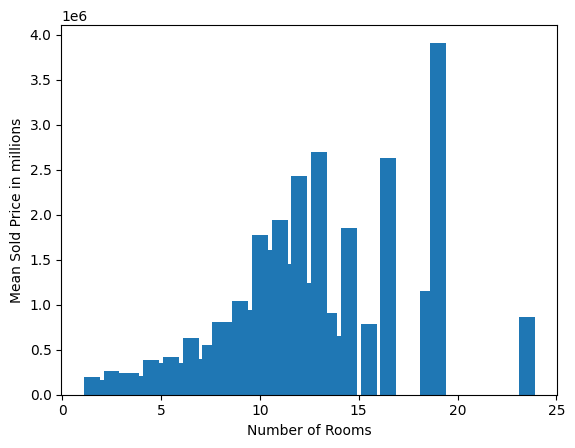

In [85]:
# combined bath + beds vs. sold price
# more rooms, higher price

df["numOfRooms"] = df["baths"] + df["beds"]

grouped_data = df.groupby("numOfRooms", as_index=False)["sold_price"].mean()

plt.bar(grouped_data["numOfRooms"], grouped_data["sold_price"])

plt.xlabel("Number of Rooms")
plt.ylabel("Mean Sold Price in millions")
plt.show()

This seems to follow the trend, but there are some odd lower values at some points, like at 16 and 24 rooms. Not sure why the trend doesn't apply at this higher room counts.

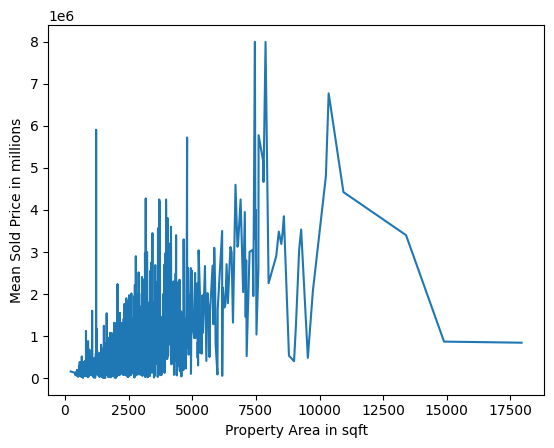

In [98]:
# sqft vs. sold price
# bigger house, higher price

grouped_data = df.groupby("sqft", as_index=False)["sold_price"].mean()

plt.plot(grouped_data["sqft"], grouped_data["sold_price"])

plt.xlabel("Property Area in sqft")
plt.ylabel("Mean Sold Price in millions")
plt.show()

This attribute follows the trend as predicted. There are outliers for the properties with 15000 sqft which goes down, so it's a similar phenomenon as the bath and bed room issue of going down at extremely high values.

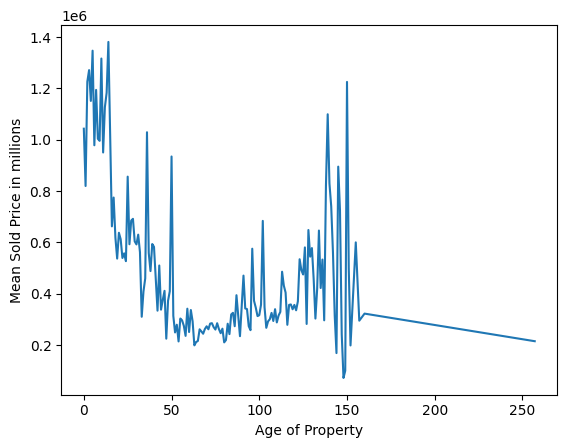

In [97]:
# age vs. sold price
# newer houses, higher price

grouped_data = df.groupby("age", as_index=False)["sold_price"].mean()

plt.plot(grouped_data["age"], grouped_data["sold_price"])

plt.xlabel("Age of Property")
plt.ylabel("Mean Sold Price in millions")
plt.show()

This attribute has a lot of variation in the trend. The price is higher if the property is new, as expected, but it also seems to peak around 150 years in age, which might be able to be attributed to larger properties being older like historical buildings. 

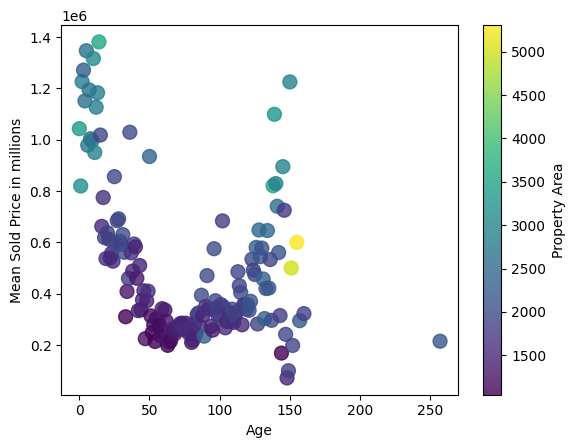

In [134]:
grouped_data = df.groupby("age", as_index=False)[["sold_price", "sqft"]].mean()

plt.scatter(grouped_data["age"], grouped_data["sold_price"], c=grouped_data["sqft"], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Property Area')

plt.xlabel("Age")
plt.ylabel("Mean Sold Price in millions")
plt.show()

This second graph actually doesn't follow the trend I expected it would. There is no discernable correlation between property area and the age. Some newer properties are very large, and so are some that are around 150 years old. There is a single outlier with an age of 250 years, a medium-size area, and a low price.

# 4.Prepare the Data


Apply any data transformations and explain what and why


After looking through the statistics, I've determined the features I'll be including to maximize prediction accuracy and minimize parameter count are zip code, number of rooms, property area, and age.

In [150]:
# i've already dropped the nans
model_df = df[["sold_price", "zip_code", "numOfRooms", "sqft", "age"]].convert_dtypes().fillna(0)
model_df.head()

,sold_price,zip_code,numOfRooms,sqft,age
1,265000,60651,7.5,1626,122
2,480000,60605,4.5,1312,23
3,334000,60608,4.5,980,105
4,585000,60611,4.5,1400,54
5,295500,60647,3.5,1000,102


In [151]:
# label encode
model_df["zip_factorized"], unique_categories = pd.factorize(model_df['zip_code'])
model_df.drop("zip_code", inplace=True, axis=1)
model_df.head()

,sold_price,numOfRooms,sqft,age,zip_factorized
1,265000,7.5,1626,122,0
2,480000,4.5,1312,23,1
3,334000,4.5,980,105,2
4,585000,4.5,1400,54,3
5,295500,3.5,1000,102,4


In [152]:
# import scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


There are 5 models I want to try:
1. Random Forest Regressor
2. Linear Multivariate Regressor
3. Ridge/Lasso Regressor
4. Support Vector Regression
5. KNN Regressor

I will use cross validation to determine which model to use for the final product.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 